In [ ]:
 #https://justkode.kr/deep-learning/pytorch-cnn/
#https://velog.io/@spaceforvincent/%EB%A7%90%ED%95%B4%EB%B4%90%EC%9A%94-%EC%95%8C%ED%8C%8C%EA%B3%B0-1

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brinkor/vehicle-type-sound-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/brinkor/vehicle-type-sound-dataset/versions/1


In [1]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#데이터셋 로더
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
#음성파일 처리
import librosa
#기타
import numpy as np


In [ ]:
# #샘플 모듈
# #여기서 레이어 등등 어쩌구
# class CNN(nn.Module):
#   def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, stride=1)
#         self.conv2 = nn.Conv2d(in_channels=20, out_channels=10, kernel_size=5, stride=1)
#         self.fc1 = nn.Linear(4 * 4 * 50, 500)
#         self.fc2 = nn.Linear(500, 10)

#   def forward(self, x):
#       print("연산 전", x.size())
#       x = F.relu(self.conv1(x))
#       print("conv1 연산 후", x.size())
#       x = F.relu(self.conv2(x))
#       print("conv2 연산 후",x.size())
#       x = x.view(-1, 10 * 12 * 12)
#       print("차원 감소 후", x.size())
#       x = F.relu(self.fc1(x))
#       print("fc1 연산 후", x.size())
#       x = self.fc2(x)
#       print("fc2 연산 후", x.size())
#       return x

In [ ]:
  # 패딩 함수
  padding = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

In [ ]:
from pickle import TRUE
from tqdm import tqdm
# 전처리
from PIL import Image

# 0 에어컨
# 2 children_playing
# 3 dog_bark
# 4 drill
# 6 gunshot
# 7 jack hammer
# 9 street music
skip_class=['0', '2', '3', '4', '6', '7', '9']

def pre_progressing(sound_dir, image_dir):
  # 마지막에 /로 끝나게
  if image_dir[-1] != '/':
    image_dir.join('/')
  if sound_dir[-1] != '/':
    sound_dir.join('/')
  for filename in tqdm(os.listdir(sound_dir)):
    # print(filename)
    # 유니코드 정규화?
    # filename = normalize('NFC', filename)
    # wav 포맷 데이터만 사용
    if '.wav' not in filename:
      continue
    # 필요없는 클래스 스
    # if filename.split('-')[1] in skip_class:
      # continue
    wav, sr = librosa.load(sound_dir+filename, sr=16000)
    # 이미지 ndarray
    mfcc = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=100, n_fft=400, hop_length=160)
    # 패딩된 ndarray
    # 리사이즈 할거면 패딩 필요없음?
    padded_mfcc = padding(mfcc, 500)

    # 해당 이미지 새로 저장
    # img = Image.fromarray(padded_mfcc)
    img = Image.fromarray(mfcc)
    img = img.convert('L')
    # resize크기 적당히 조절
    img = img.resize([32,32])
    img.save(image_dir+filename+'.jpg','JPEG')

# 돌리기 전에 폴더 비워둘것
# 클래스 빈 폴더 생성
# for i in range(10):
#   os.makedirs('/content/mount/MyDrive/image_set/'+str(i), exist_ok=True)
# 전처리 과정 수행
# for i in range(10):
  # pre_progressing('/content/mount/MyDrive/gist_공모전/archive-2/fold'+str(i+1)+'/', '/content/mount/MyDrive/image_set/')
# pre_progressing('/content/drive/MyDrive/gist_공모전/vehicle_type_sound_dataset/cutted_files/', '/content/drive/MyDrive/image_set/')


100%|██████████| 1705/1705 [22:33<00:00,  1.26it/s]


In [23]:
# 전처리 파일을 csv 참고해서 분류
# 0 - car class
#	1 - truck, bus and van class
#	2 - motorcycle class
import pandas as pd
import shutil
import os
data = pd.read_csv('/content/mount/MyDrive/gist_공모전/vehicle_type_sound_dataset/labels.csv')
for i, item in data.iterrows():
  shutil.move(os.path.join('/content/mount/MyDrive/image_set/',item['file_path']+'.jpg'), os.path.join('/content/mount/MyDrive/image_set/'+str(item['class'])+'/'+item['file_path']+'.jpg'))

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt

# 데이터로더
dataset = ImageFolder(root='/content/mount/MyDrive/image_set/',transform=transforms.Compose([transforms.ToTensor(),]))

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 각각의 데이터셋에 대해 DataLoader 생성
train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Epoch 1/50:
Train Loss: 0.8335, Train Acc: 0.6444
Validation Loss: 0.8207, Validation Acc: 0.5220
Epoch 2/50:
Train Loss: 0.6601, Train Acc: 0.7214
Validation Loss: 0.7850, Validation Acc: 0.7097
Epoch 3/50:
Train Loss: 0.6023, Train Acc: 0.7302
Validation Loss: 0.6933, Validation Acc: 0.6921
Epoch 4/50:
Train Loss: 0.5475, Train Acc: 0.7654
Validation Loss: 0.6933, Validation Acc: 0.6598
Epoch 5/50:
Train Loss: 0.5816, Train Acc: 0.7493
Validation Loss: 0.7264, Validation Acc: 0.7126
Epoch 6/50:
Train Loss: 0.5579, Train Acc: 0.7683
Validation Loss: 0.6755, Validation Acc: 0.7185
Epoch 7/50:
Train Loss: 0.5194, Train Acc: 0.7771
Validation Loss: 0.7312, Validation Acc: 0.7038
Epoch 8/50:
Train Loss: 0.4868, Train Acc: 0.7889
Validation Loss: 0.6336, Validation Acc: 0.6833
Epoch 9/50:
Train Loss: 0.4663, Train Acc: 0.8145
Validation Loss: 0.6813, Validation Acc: 0.7361
Epoch 10/50:
Train Loss: 0.4181, Train Acc: 0.8182
Validation Loss: 0.7149, Validation Acc: 0.6305
Epoch 11/50:
Train 

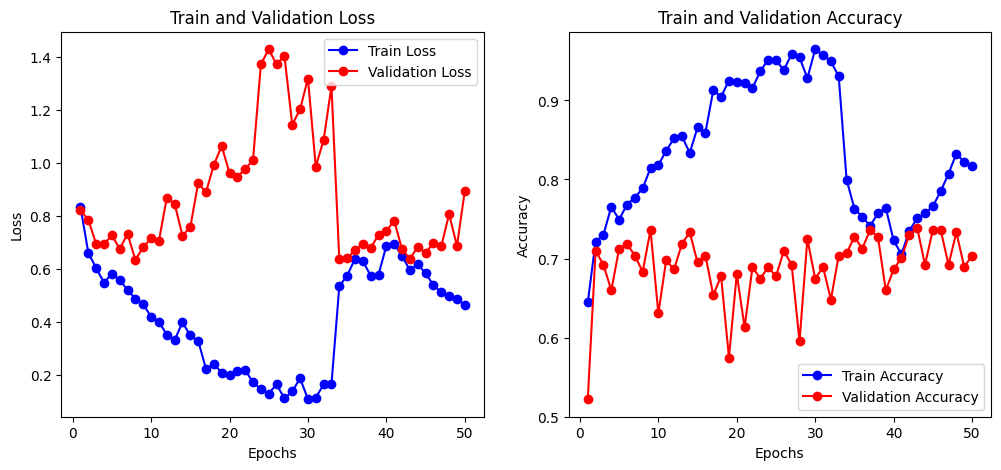

In [28]:
#GPT코드
#mobilenet 버전
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt

# 1. MobileNetV2 모델 불러오기 (pretrained 모델 사용 가능)
model = models.mobilenet_v2(pretrained=True)  # 미리 학습된 가중치 사용
# 만약 MobileNetV3를 사용하려면: models.mobilenet_v3_large(pretrained=True)

# 2. 모델의 마지막 레이어를 학습할 데이터에 맞게 수정 (예: 10개 클래스라면 10으로 수정)
num_classes = len(os.listdir('/content/mount/MyDrive/image_set/'))  # 예시: 클래스가 10개인 경우
model.classifier[1] = nn.Linear(model.last_channel, num_classes)  # 마지막 레이어 수정

# 3. 모델을 GPU로 보내기 (가능한 경우)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 4. 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. 학습 함수 정의
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 (Forward pass)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 역전파 (Backward pass) 및 최적화
        loss.backward()
        optimizer.step()

        # 손실 계산
        running_loss += loss.item()

        # 정확도 계산
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels).item()
        total_predictions += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct_predictions / total_predictions
    return epoch_loss, epoch_acc

# 6. 검증 함수 정의
def validate_model(model, val_loader, criterion, device):
    model.eval()  # 모델을 평가 모드로 설정
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():  # 검증 시에는 그래디언트를 계산하지 않음
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 순전파
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 손실 계산
            running_loss += loss.item()

            # 정확도 계산
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels).item()
            total_predictions += labels.size(0)

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = correct_predictions / total_predictions
    return epoch_loss, epoch_acc

# 7. 학습 및 검증 루프 실행 및 평가지표 저장
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_acc = train_model(model, train_data_loader, criterion, optimizer, device)
    val_loss, val_acc = validate_model(model, val_data_loader, criterion, device)

    # 각 epoch의 손실과 정확도를 저장
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}')

    early_stopping(val_loss, model) # 현재 과적합 상황 추적

    if early_stopping.early_stop: # 조건 만족 시 조기 종료
        print('early_stopping')
        break

print("Training complete.")

# 8. 학습 및 검증 결과 그래프 그리기
epochs = range(1, num_epochs + 1)

# Loss 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Train Loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'bo-', label='Train Accuracy')
plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델 저장
torch.save(model.state_dict(), '/content/mount/MyDrive/model_state_dict.pt')

In [ ]:
#GPT가 짠 코드
#resnet버전
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, filters_in, filters_out):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(filters_in, filters_in, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn1 = nn.BatchNorm2d(filters_in)
        self.conv2 = nn.Conv2d(filters_in, filters_in, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(filters_in)
        self.conv3 = nn.Conv2d(filters_in, filters_out, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn3 = nn.BatchNorm2d(filters_out)

        # Shortcut layer
        if filters_in != filters_out:
            self.shortcut = nn.Conv2d(filters_in, filters_out, kernel_size=1, stride=1, padding=0, bias=False)
        else:
            self.shortcut = None

    def forward(self, x):
        shortcut = x

        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))

        if self.shortcut is not None:
            shortcut = self.shortcut(x)

        out += shortcut
        out = F.relu(out)
        return out

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Initial Conv Layer
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Residual Blocks
        self.res_block1 = ResidualBlock(16, 32)
        self.res_block2 = ResidualBlock(32, 32)
        self.res_block3 = ResidualBlock(32, 64)
        self.res_block4 = ResidualBlock(64, 64)

        # Global Average Pooling
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layers
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 10)

        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Initial Conv Layer
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)

        # Residual Blocks with Pooling
        x = self.res_block1(x)
        x = self.pool(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.pool(x)
        x = self.res_block4(x)

        # Global Average Pooling
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)  # Flatten

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Model instantiation
model = CNNModel()

# Loss and Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# To check the model summary and architecture, we can print it.
print(model)

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (res_block1): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (res_block2): ResidualBlock(
    (conv1): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=Fa

In [ ]:

# Device 설정 (GPU 사용 가능한 경우 GPU 사용)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 인스턴스 생성 및 GPU로 이동
model = CNNModel().to(device)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 루프 정의
def train(model, train_data_loader, criterion, optimizer, num_epochs=10):
    model.train()  # 모델을 학습 모드로 전환
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (inputs, labels) in enumerate(train_data_loader):
            # 데이터와 레이블을 GPU로 이동
            inputs, labels = inputs.to(device), labels.to(device)

            # 옵티마이저의 기울기 초기화
            optimizer.zero_grad()

            # 모델을 통해 예측 수행
            outputs = model(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)

            # 역전파 및 가중치 업데이트
            loss.backward()
            optimizer.step()

            # 통계 업데이트
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # 100번째 배치마다 중간 결과 출력
            if batch_idx % 100 == 99:  # 100배치마다 로그
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_data_loader)}], '
                      f'Loss: {running_loss / 100:.4f}, Accuracy: {100 * correct / total:.2f}%')
                running_loss = 0.0

    print('Finished Training')

# 실제 학습 실행
train(model, train_data_loader, criterion, optimizer, num_epochs=10)

Finished Training


In [ ]:
# 성능 평가 함수 (검증 또는 테스트 데이터로 성능 확인)
def evaluate(model, data_loader, criterion):
    model.eval()  # 모델을 평가 모드로 전환
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # 평가 시에는 역전파 불필요
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    avg_loss = total_loss / len(data_loader)

    print(f'Validation Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    return avg_loss, accuracy

evaluate(model, val_data_loader, criterion)

Validation Loss: 0.3188, Validation Accuracy: 90.29%


(0.31875442607062204, 90.29345372460497)